<div id="container" style="position:relative;">
<div style="float:left"><h1> Leveraging Data Science to Promote Transparency in Elections: </h1></div>
<div style="float:left"><h2> The case of Peru </h2></div> 
<div style="position:relative; float:right"><img style="height:60px" src ="https://drive.google.com/uc?export=view&id=1EnB0x-fdqMp6I5iMoEBBEuxB_s7AmE2k" />
</div>
</div>    

### Notebook 1 of 4 : EDA  
**by Giancarlo Marchesi**

## Introduction 

Elections are facing higher scrutiny as smartphones and social media make it easier to disseminate information in real-time. The challenge for the electoral process is that greater dissemination can be, inadvertently or not, biased or not factual. Data Science can provide governments with statistical tools to improve data collection, processing, tabulating, and validation of the results. This, in turn,  can provide higher transparency, expedience, and confidence in the results. 

In this project, I will apply three methodologies to explore the results of the recent Peruvian presidential election. The second round took place on June 6th, 2021. One of the candidates, Keiko Fujimori has decried foul-play arising from less-than-expected results in certain regions. The electoral court is still reviewing the case 45 days after election day. 

The Peruvian electoral process uses paper ballots. Ballots are discarded the same day after results are tabulated at the polling station. The poll workers submit an official handwritten ballot summary sheet to ONPE, the elections bureau. Summary sheets are signed by the three randomly assigned poll workers and a representative from each party. 

The project will use Data Science methods like linear regression, decision tree regressor and Benford's law to highlight potential patterns arising from the data. The results of the analysis may provide recommendations for improving the transaparency of the results of the election to the public.  

The project is divided in the following notebooks: 

1. EDA: data cleaning and feature engineering on the results of the first and second rounds of the presidential election 
2. Linear regression: modelling on the results of both rounds of the election
3. Decision Tree Regresor: alternative model to linear regression for use as comparison
4. Benford's Law: application to several variables of the dataset to test the randomness of the results

**Data sources**
1. Data for the second round of the presidential election of June 6th, 2021
https://www.datosabiertos.gob.pe/dataset/resultados-por-mesa-de-las-elecciones-presidenciales-2021-segunda-vuelta-oficina-nacional-2
2. Data for the first round of the presidential and congressional election of April 11, 2021
https://www.datosabiertos.gob.pe/dataset/resultados-por-mesa-de-las-elecciones-presidenciales-2021-primera-vuelta-oficina-nacional-de

In [1]:
## Necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**EDA process**

The EDA process will be performed similarly on the first and second round datasets. The output of each EDA is a clean csv file. The third step of the EDA process is to merge both into a final dataset for regression analysis. The accompanying graph shows the process followed in this notebook. 

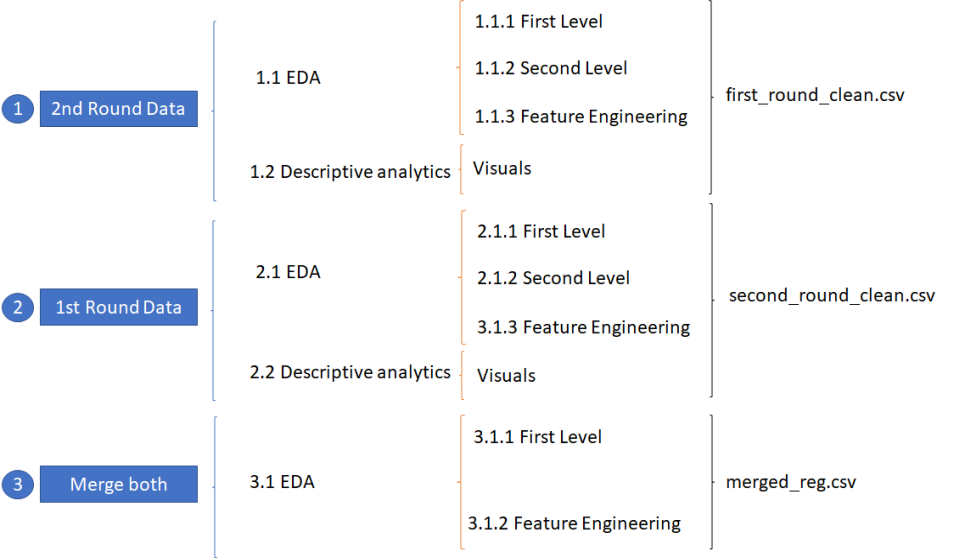

In [2]:
from IPython.display import Image
Image("edacapstone.png")

## 1. Second Round Data

In [3]:
dfsecond=pd.read_csv('data/second_round.csv', sep=';', index_col=False)

In [4]:
dfsecond.shape

(86488, 15)

The 86488 rows correspond to the individual polling stations in Peru and the world opened during the second round of the Peruvian presidential election.  

In [5]:
## A first look at the dataset 
dfsecond.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86488 entries, 0 to 86487
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   UBIGEO               86488 non-null  int64  
 1   DEPARTAMENTO         86488 non-null  object 
 2   PROVINCIA            86488 non-null  object 
 3   DISTRITO             86488 non-null  object 
 4   TIPO_ELECCION        86488 non-null  object 
 5   MESA_DE_VOTACION     86488 non-null  int64  
 6   DESCRIP_ESTADO_ACTA  86488 non-null  object 
 7   TIPO_OBSERVACION     0 non-null      float64
 8   N_CVAS               86482 non-null  float64
 9   N_ELEC_HABIL         86488 non-null  int64  
 10  VOTOS_P1             86237 non-null  float64
 11  VOTOS_P2             86184 non-null  float64
 12  VOTOS_VB             58596 non-null  float64
 13  VOTOS_VN             85868 non-null  float64
 14  VOTOS_VI             2947 non-null   float64
dtypes: float64(7), int64(3), object(5)
m

### 1.1 Exploratory data analysis

We will conduct EDA in three levels, as there are various simultaneous situations happening with the data. 

- First level: dropping variables and transalating from Spanish to English
- Second level: data cleaning and consistency checks 
- Third level: feature engineering 

#### 1.1.1 First level 

In this first level of EDA we notice that: 

1. `TIPO_OBERVACION` seems to not have any data. Proceed to Drop. 
2. `TIPO_ELECCION` refers to the type of election, which is "presidential" for all observations. Proceed to Drop.
3.  All variable names are in Spanish. Rename.
4.  Rename the contents of `DESCRIP_ESTADO_ACTA`

In [6]:
## 1. Let's check 'TIPO_OBSERVACION'
dfsecond['TIPO_OBSERVACION'].value_counts()

Series([], Name: TIPO_OBSERVACION, dtype: int64)

In [7]:
## It's empty. We proceed to drop it 
dfsecond.drop(columns={'TIPO_OBSERVACION'}, inplace=True)

In [8]:
## 2. Let's check 'TIPO_ELECCION'
dfsecond['TIPO_ELECCION'].value_counts()

PRESIDENCIAL    86488
Name: TIPO_ELECCION, dtype: int64

In [9]:
## There is only one value, "PRESIDENCIAL". We proceed to drop it 
dfsecond.drop(columns={'TIPO_ELECCION'}, inplace=True)

In [10]:
## 3. Renaming the variables using the dictionary provided on the Peruvian Government's Open Data site
## We'll do this by groups

dfsecond=dfsecond.rename(columns={'UBIGEO':'Geocode', 'DEPARTAMENTO': 'State', 'PROVINCIA':'Province',  'DISTRITO': 'District'  })

In [11]:
dfsecond=dfsecond.rename(columns={'MESA_DE_VOTACION':'Poll_station', 'DESCRIP_ESTADO_ACTA': 'Ballot_summary_cond_2', 'N_CVAS':'Votes_2', 'N_ELEC_HABIL': 'Eligible_voters_2'})

In [12]:
dfsecond=dfsecond.rename(columns={'VOTOS_P1':'Castillo_2', 'VOTOS_P2': 'Fujimori_2', 'VOTOS_VB':'Blank_2',  'VOTOS_VN': 'Null_2', 'VOTOS_VI':'Contested_2'})

In [13]:
dfsecond.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86488 entries, 0 to 86487
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Geocode                86488 non-null  int64  
 1   State                  86488 non-null  object 
 2   Province               86488 non-null  object 
 3   District               86488 non-null  object 
 4   Poll_station           86488 non-null  int64  
 5   Ballot_summary_cond_2  86488 non-null  object 
 6   Votes_2                86482 non-null  float64
 7   Eligible_voters_2      86488 non-null  int64  
 8   Castillo_2             86237 non-null  float64
 9   Fujimori_2             86184 non-null  float64
 10  Blank_2                58596 non-null  float64
 11  Null_2                 85868 non-null  float64
 12  Contested_2            2947 non-null   float64
dtypes: float64(6), int64(3), object(4)
memory usage: 8.6+ MB


Now that variables are in English, we can explain variable names:

- `Geocode`: is a unique six digit identifier that represents the state, province and district, with 2 digits each. 
- `State`: is the state (25 total) or continent of the polling place
- `Province`: is the province (subdividion of state) of the polling place
- `District`: is the district (subdivision of province) of the polling place
- `Poll_place`: is the identifier of the polling place 
- `Ballot_summary_cond`: is the condition of the official document that summarizes ballot tallies. 
- `Votes`: the total of votes cast per polling place 
- `Eligible_voters`: the total elegigle voters per polling place
- `Castillo`: the number of votes for candidate Pedro Castillo at a given polling place
- `Fujimori`: the number of votes for candidate Keiko Fujimori at a given polling place
- `Blank`: the number of blank votes at a given polling place
- `Null`: the number of null votes at a given polling place
- `Constested`: the number of contested votes at a given polling place

In [14]:
dfsecond['Ballot_summary_cond_2'].value_counts()

CONTABILIZADA         84863
COMPUTADA RESUELTA     1386
ANULADA                 213
EN PROCESO               20
SIN INSTALAR              6
Name: Ballot_summary_cond_2, dtype: int64

In [15]:
## 4. Renaming the contents of DESCRIPCION_ESTADO_ACTA, now called Ballot_summary_cond
dfsecond.loc[dfsecond['Ballot_summary_cond_2']=='CONTABILIZADA', 'Ballot_summary_cond_2']='Counted'
dfsecond.loc[dfsecond['Ballot_summary_cond_2']=='COMPUTADA RESUELTA', 'Ballot_summary_cond_2']='Resolved'
dfsecond.loc[dfsecond['Ballot_summary_cond_2']=='ANULADA', 'Ballot_summary_cond_2']='Annulled'
dfsecond.loc[dfsecond['Ballot_summary_cond_2']=='EN PROCESO', 'Ballot_summary_cond_2']='In process'
dfsecond.loc[dfsecond['Ballot_summary_cond_2']=='SIN INSTALAR', 'Ballot_summary_cond_2']='Did not open'

In [16]:
dfsecond['Ballot_summary_cond_2'].value_counts()

Counted         84863
Resolved         1386
Annulled          213
In process         20
Did not open        6
Name: Ballot_summary_cond_2, dtype: int64

Now that the variables are in English, let's proceed with the second level of EDA. 

#### 1.1.2 Second level 

1. Check for null values
2. Check for duplicates
3. Check if votes add upp
4. Consistency of eligible and actual voters


In [17]:
## 1. Check for null values
dfsecond.isna().sum()

Geocode                      0
State                        0
Province                     0
District                     0
Poll_station                 0
Ballot_summary_cond_2        0
Votes_2                      6
Eligible_voters_2            0
Castillo_2                 251
Fujimori_2                 304
Blank_2                  27892
Null_2                     620
Contested_2              83541
dtype: int64

Let's look at the individual causes for these null values.  

In the case of the vote counts:
-`Castillo_2`
-`Fujimori_2`
-`Blank_2`
-`Contested_2`

The NaN mean that the candidates got zero votes at that polling station. Same applies to blank votes (non of the candidates selected) or null votes (purposedly scratched or ambiguous). 27892 of the 86000 polling stations did not have any blank votes. Only 620 polling stations did not have any null votes.  


In [18]:
dfsecond['Contested_2'].sort_values(ascending=False)

1130     0.0
58033    0.0
58017    0.0
58018    0.0
58019    0.0
        ... 
86483    NaN
86484    NaN
86485    NaN
86486    NaN
86487    NaN
Name: Contested_2, Length: 86488, dtype: float64

The electoral authority, ONPE, published the total count of contested ballot summaries the day after the election. At any given point it was never higher than 3,000. It is consistent with the there being 83541 polling places without any contested ballots and 2947 with contested ballots. Let's take a closer look.

There are no more contested ballots. The election is now up to the National Elections Court to decide. However, it seems that ONPE has left '0.0' as the number where there were contested ballots (but not anymore, as their revision process is over) and NaN for polling stations that never had contested ballots. 

Let's fill those zeroes with ones and assign the NaN to zeros. 

In [19]:
dfsecond.loc[dfsecond['Contested_2']==0.0, 'Contested_2']=1

In [20]:
dfsecond['Contested_2'].sort_values(ascending=False)

1130     1.0
58033    1.0
58017    1.0
58018    1.0
58019    1.0
        ... 
86483    NaN
86484    NaN
86485    NaN
86486    NaN
86487    NaN
Name: Contested_2, Length: 86488, dtype: float64

In [21]:
## Now, let's fill all NaN for the data set with zeroes. 
dfsecond=dfsecond.fillna(0)

In [22]:
dfsecond.isna().sum()

Geocode                  0
State                    0
Province                 0
District                 0
Poll_station             0
Ballot_summary_cond_2    0
Votes_2                  0
Eligible_voters_2        0
Castillo_2               0
Fujimori_2               0
Blank_2                  0
Null_2                   0
Contested_2              0
dtype: int64

In [23]:
## 3. Check for duplicates. Poll_station should have only unique values
dfsecond['Poll_station'].describe()

count     86488.000000
mean      72590.246924
std      161782.724177
min           1.000000
25%       21622.750000
50%       43244.500000
75%       64866.250000
max      903108.000000
Name: Poll_station, dtype: float64

In [24]:
dfsecond['Poll_station'].nunique()

86488

Although the polling place numbers are not sequential, there are indeed 86488 unique polling places, corresponding to the rows. 

In [25]:
## 4. Check if Votes add up by subtracting all types of votes from the 'Votes' variable
check = dfsecond['Votes_2']- dfsecond['Castillo_2'] - dfsecond['Fujimori_2'] - dfsecond['Blank_2'] - dfsecond['Null_2']

In [26]:
check.unique()

array([0.])

In [27]:
check.sum()

0.0

Indeed, votes add up. There are no residuals in any polling places. All values are zero. 

In [28]:
## 5. Check consistency of elegible voters > actual voters. 
check2 = dfsecond['Eligible_voters_2'] - dfsecond['Votes_2']

In [29]:
check2.describe()

count    86488.000000
mean        74.358709
std         37.505846
min          0.000000
25%         51.000000
50%         66.000000
75%         87.000000
max        300.000000
dtype: float64

There are no negative values. The minumum value is zero. 

In [30]:
## Calculating the number of eligible voters
dfsecond['Eligible_voters_2'].sum()

25287954

#### 1.1.3. Feature engineering

Two main features will be addressed in this section: 

1. `REgion`: a new column to help guide the analysis by grouping certain states and the continents abroad
2. `Ballot_summary_cond`: eliminate or reclassify all labeling errors in the data

In [31]:
## 1. We'll assign South as the default region because is the most frequent. We'll change the rest accordingly 
dfsecond['Region']= 'South'

In [32]:
## Setting the values for the Abroad region
dfsecond.loc[dfsecond['State'] == 'AFRICA', 'Region']='Abroad'
dfsecond.loc[dfsecond['State'] == 'AMERICA', 'Region']='Abroad'
dfsecond.loc[dfsecond['State'] == 'EUROPA', 'Region']='Abroad'
dfsecond.loc[dfsecond['State'] == 'ASIA', 'Region']='Abroad'
dfsecond.loc[dfsecond['State'] == 'OCEANIA', 'Region']='Abroad'

In [33]:
## Setting the values for the East region
dfsecond.loc[dfsecond['State'] == 'AMAZONAS', 'Region']='East'
dfsecond.loc[dfsecond['State'] == 'UCAYALI', 'Region']='East'
dfsecond.loc[dfsecond['State'] == 'LORETO', 'Region']='East'
dfsecond.loc[dfsecond['State'] == 'MADRE DE DIOS', 'Region']='East'
dfsecond.loc[dfsecond['State'] == 'SAN MARTIN', 'Region']='East'

In [34]:
## Setting the values for the Coast region
dfsecond.loc[dfsecond['State'] == 'ICA', 'Region']='Coast'
dfsecond.loc[dfsecond['State'] == 'LIMA', 'Region']='Coast'
dfsecond.loc[dfsecond['State'] == 'CALLAO', 'Region']='Coast'
dfsecond.loc[dfsecond['State'] == 'LAMBAYEQUE', 'Region']='Coast'
dfsecond.loc[dfsecond['State'] == 'LA LIBERTAD', 'Region']='Coast'
dfsecond.loc[dfsecond['State'] == 'PIURA', 'Region']='Coast'
dfsecond.loc[dfsecond['State'] == 'TUMBES', 'Region']='Coast'

In [35]:
## Setting the values for the Central region
dfsecond.loc[dfsecond['State'] == 'CAJAMARCA', 'Region']='Central'
dfsecond.loc[dfsecond['State'] == 'HUANCAVELICA', 'Region']='Central'
dfsecond.loc[dfsecond['State'] == 'HUANUCO', 'Region']='Central'
dfsecond.loc[dfsecond['State'] == 'JUNIN', 'Region']='Central'
dfsecond.loc[dfsecond['State'] == 'PASCO', 'Region']='Central'
dfsecond.loc[dfsecond['State'] == 'ANCASH', 'Region']='Central'

In [36]:
dfsecond['Region'].value_counts()

Coast      46489
South      14966
Central    14195
East        7398
Abroad      3440
Name: Region, dtype: int64

More than half of the polling stations are in the Coast region. South and Central have almost the same amount of polling stations. The Abroad region has the least by far. Now, let's zoom in on `Ballot_summary_cond_2`. 

In [37]:
## Checking the status for Ballot_summary_cond_2
dfsecond['Ballot_summary_cond_2'].value_counts()

Counted         84863
Resolved         1386
Annulled          213
In process         20
Did not open        6
Name: Ballot_summary_cond_2, dtype: int64

In [38]:
## Drop Annulled and Did not open
dfsecond.drop(dfsecond[dfsecond['Ballot_summary_cond_2'] == 'Annulled'].index, inplace=True)
dfsecond.drop(dfsecond[dfsecond['Ballot_summary_cond_2'] == 'Did not open'].index, inplace=True)

In [39]:
dfsecond['Ballot_summary_cond_2'].value_counts()

Counted       84863
Resolved       1386
In process       20
Name: Ballot_summary_cond_2, dtype: int64

Let's see if there are any mislabelings in the data for each of the 3. For one, 'In process' should not exist, as all the votes had been proccesed when the data was released.   

In [40]:
dfsecond[dfsecond['Ballot_summary_cond_2'] == 'In process']

,Geocode,State,Province,District,Poll_station,Ballot_summary_cond_2,Votes_2,Eligible_voters_2,Castillo_2,Fujimori_2,Blank_2,Null_2,Contested_2,Region
3764,140137,LIMA,LIMA,SAN JUAN DE LURIGANCHO,53305,In process,222.0,300,112.0,100.0,0.0,10.0,0.0,Coast
3800,140137,LIMA,LIMA,SAN JUAN DE LURIGANCHO,53770,In process,210.0,300,0.0,0.0,0.0,210.0,0.0,Coast
3808,140137,LIMA,LIMA,SAN JUAN DE LURIGANCHO,52693,In process,236.0,300,83.0,139.0,5.0,9.0,0.0,Coast
9136,140137,LIMA,LIMA,SAN JUAN DE LURIGANCHO,52364,In process,240.0,300,100.0,119.0,3.0,18.0,0.0,Coast
9982,170301,MOQUEGUA,ILO,ILO,63879,In process,262.0,300,182.0,68.0,0.0,12.0,0.0,South
25409,140137,LIMA,LIMA,SAN JUAN DE LURIGANCHO,52400,In process,242.0,300,0.0,0.0,0.0,242.0,0.0,Coast
25512,140137,LIMA,LIMA,SAN JUAN DE LURIGANCHO,53430,In process,229.0,300,106.0,113.0,1.0,9.0,0.0,Coast
34370,90706,HUANUCO,PACHITEA,UMARI,901611,In process,202.0,261,165.0,34.0,0.0,3.0,0.0,Central
36356,140137,LIMA,LIMA,SAN JUAN DE LURIGANCHO,53486,In process,300.0,300,0.0,0.0,0.0,300.0,0.0,Coast
41814,140137,LIMA,LIMA,SAN JUAN DE LURIGANCHO,52549,In process,245.0,300,117.0,120.0,0.0,8.0,0.0,Coast


What we are seeing here is that some Votes_2 are equal to Null_2, while Fujimori and Castillo have zero votes. For the purposes of this analysis, these are mislabeled as 'In Process' and not 'Anulled'. The other rows, on the contrary, have been resolved and processed. 

In [41]:
## Dropping rows where null is equal to votes
dfsecond.drop(dfsecond[dfsecond['Null_2']==dfsecond['Votes_2']].index, inplace=True)

In [42]:
dfsecond['Ballot_summary_cond_2'].value_counts()

Counted       84860
Resolved       1381
In process       14
Name: Ballot_summary_cond_2, dtype: int64

We've dropped 6 more rows. Now to flag the 'In process' rows as 'Resolved'

In [43]:
dfsecond.loc[dfsecond['Ballot_summary_cond_2'] == 'In process', 'Ballot_summary_cond_2']='Resolved'

In [44]:
dfsecond['Ballot_summary_cond_2'].value_counts()

Counted     84860
Resolved     1395
Name: Ballot_summary_cond_2, dtype: int64

In [45]:
## Checking that no Resolved or Counted are actually annulled
dfsecond[dfsecond['Null_2']==dfsecond['Votes_2']]

,Geocode,State,Province,District,Poll_station,Ballot_summary_cond_2,Votes_2,Eligible_voters_2,Castillo_2,Fujimori_2,Blank_2,Null_2,Contested_2,Region


The query is empty. Hence, the dataset for the second round is clean, with 86255 rows of data (99.73%). 

We'll export it as a csv to use it in other notebooks as well. 

In [46]:
## We'll export this clean dataset to perform regression analysis
dfsecond.to_csv('data/second_round_clean.csv', index=False)

### 1.2 Descriptive analytics

In this section, we will plot a series of variables to understand the dataset visually. First, let's understand some others of magnitud. 

*Turnout at the national level*

In [47]:
## Total eligible voters
dfsecond['Eligible_voters_2'].sum()

25220598

In [48]:
## Total votes cast
dfsecond['Votes_2'].sum()

18811494.0

In [49]:
## Turnout is 74.57%
dfsecond['Votes_2'].sum()/dfsecond['Eligible_voters_2'].sum()

0.7458781905171321

*Total votes for both candidates*

In [50]:
## Total votes cast for Castillo
dfsecond['Castillo_2'].sum()

8835970.0

In [51]:
## Total votes cast for Fujimori
dfsecond['Fujimori_2'].sum()

8791730.0

In [52]:
## total blank votes 
dfsecond['Blank_2'].sum()

121478.0

In [53]:
## total null votes in valid polling station
dfsecond['Null_2'].sum()

1062316.0

In [54]:
## preparing the data for a visualization 
datapie = {'Category': ['Castillo', 'Fujimori', 'Blank', 'Null'], 'Votes': [8835970, 8791730, 121478, 1062316]}  

In [55]:
## Creating a dataframe
dpie = pd.DataFrame(datapie)

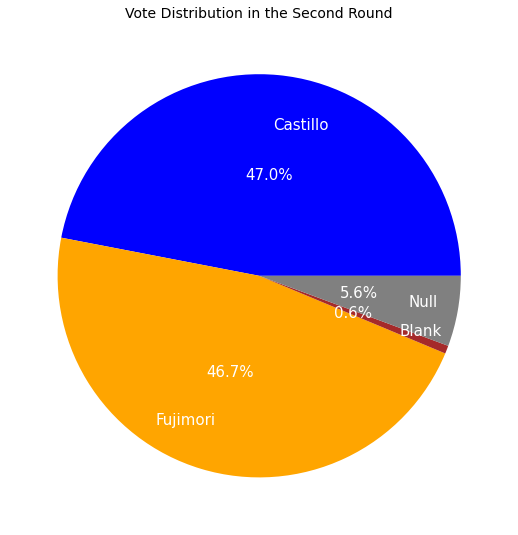

In [56]:
fig = plt.figure(figsize=(7,7))
ax = fig.add_axes([1,1,1,1])
ax.axis('equal')
ax.pie(dpie['Votes'], labels = dpie['Category'], colors=['blue', 'orange', 'brown', 'gray'], textprops={'size':15, 'color': 'white'}, labeldistance=0.75, pctdistance=0.5, autopct='%1.1f%%')
plt.title('Vote Distribution in the Second Round', size=14)
plt.show()

In [57]:
#Difference in vote count
dfsecond['Castillo_2'].sum()-dfsecond['Fujimori_2'].sum()

44240.0

There is a very slim margin of little more than 44k votes between the candidates. 

#### 1.2.1 Histograms of total votes

In [58]:
## Lets look at the distribution of vote count
dfsecond['Votes_2'].describe()

count    86255.000000
mean       218.091635
std         42.771467
min          2.000000
25%        204.000000
50%        230.000000
75%        246.000000
max        300.000000
Name: Votes_2, dtype: float64

The average amount of votes per polling place is 218. The median is 230. The maximum is 300. 

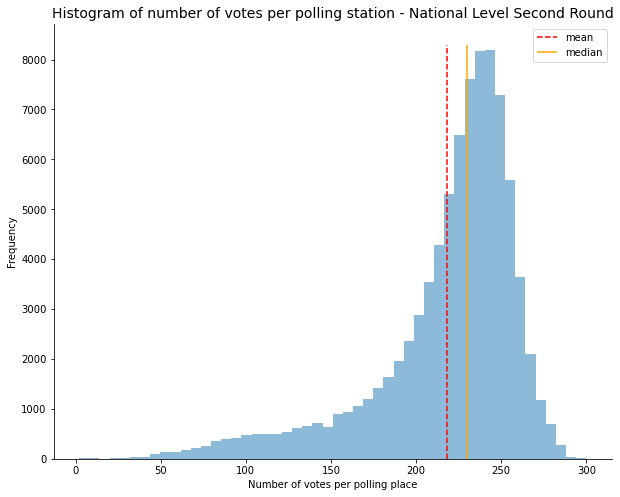

In [59]:
#Histogram for the Second Round at the National Level
plt.figure(figsize=(10,8))
plt.hist(dfsecond['Votes_2'], bins=50, alpha=0.5)
plt.xlabel('Number of votes per polling place')
plt.ylabel('Frequency')
plt.title('Histogram of number of votes per polling station - National Level Second Round', size=14)
plt.vlines(dfsecond['Votes_2'].mean(), 0, 8300, color="red", linestyles="--", label='mean')
plt.vlines(dfsecond['Votes_2'].median(), 0, 8300, color="orange", linestyles="-", label='median')
sns.despine()
plt.legend()
plt.show()

The distribution is left skewed. The mode is to the right of the mean an median. This could signal a divide in the number of voters between urban and rural areas. Regional breakdowns will be shown in Tableau. 

Lets look at the regional histograms. 

Region: Coast


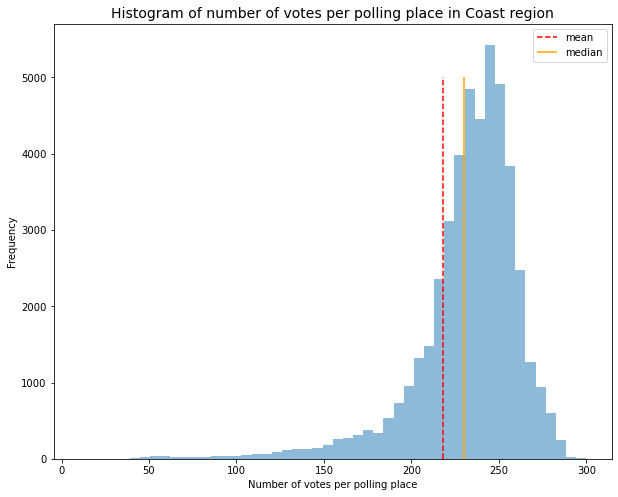



Region: South


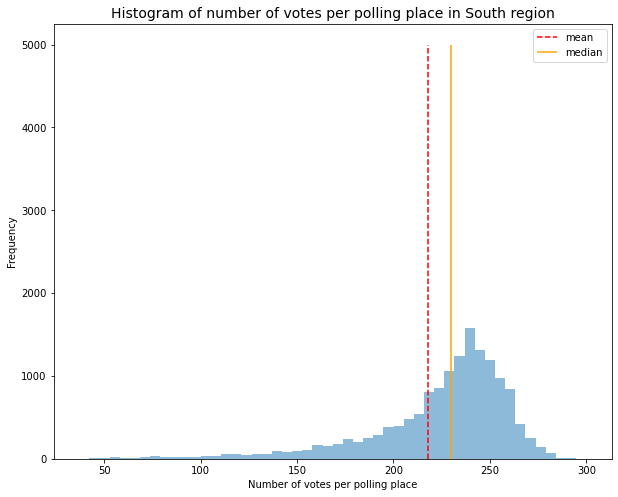



Region: Central


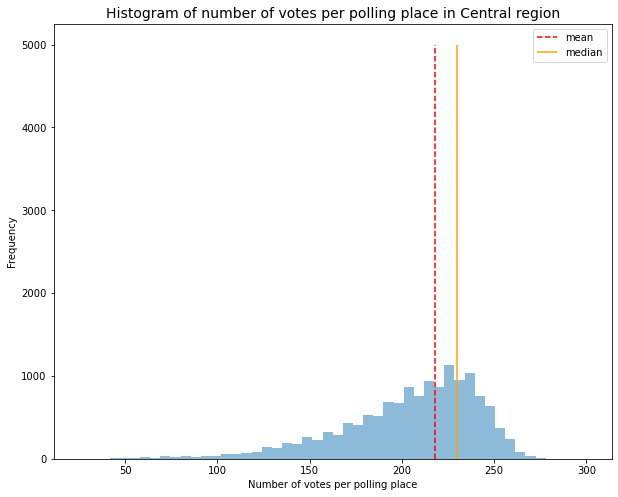



Region: East


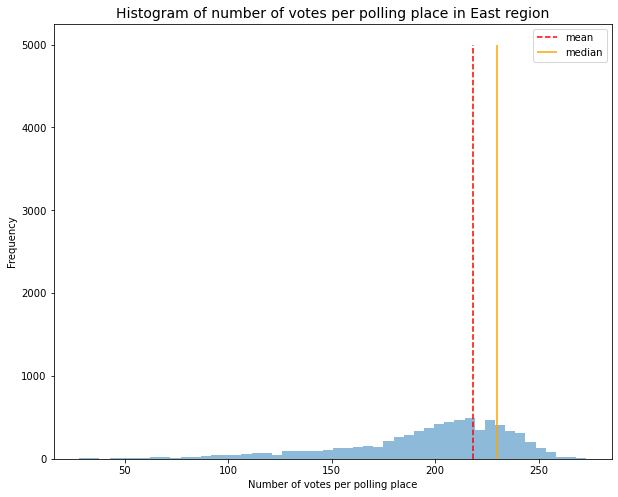



Region: Abroad


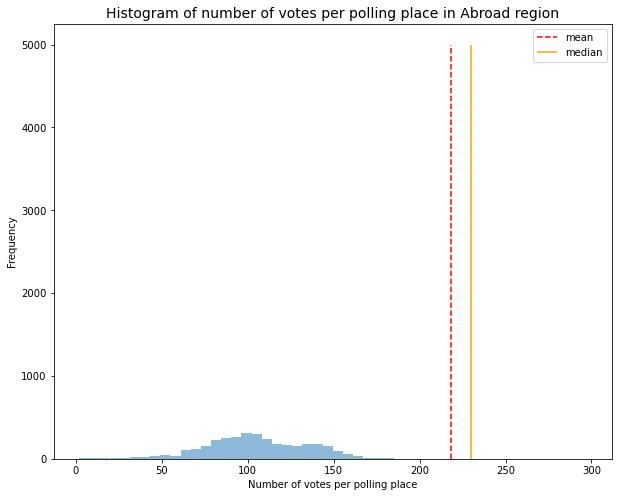

In [60]:
regions=['Coast', 'South', 'Central', 'East', 'Abroad']

for i in regions:
    print('Region:', i)
    
    plt.figure(figsize=(10,8))
    plt.hist(dfsecond[dfsecond['Region']==i]['Votes_2'], bins=50, alpha=0.5)
    plt.xlabel('Number of votes per polling place')
    plt.ylabel('Frequency')
    plt.title(f"Histogram of number of votes per polling place in {i} region", size=14)
    plt.vlines(dfsecond['Votes_2'].mean(), 0, 5000, color="red", linestyles="--", label='mean')
    plt.vlines(dfsecond['Votes_2'].median(), 0, 5000, color="orange", linestyles="-", label='median')
    plt.legend()
    plt.show()

    print('\n')

The histograms give us the following information: 

- The Coast and South regions have similar distributions, with a left skew and the mode to the right of mean and median, though the vote count in the Coast is substantially larger.  
- The Central and East regions also have a smaller left skew, with the mode being closer to the median, both above the average. 
- The Aborad region seems to be bimodal, with a first mode around 100 voters and a second one around 135. There is a significant difference in turnout with regards to the other 4 regions.  

**How important is each region in the vote count?**

In [61]:
total_votes=dfsecond.groupby('Region')['Votes_2'].sum()

In [62]:
total_votes=total_votes.reset_index()

In [63]:
total_votes['Votes_2']=total_votes['Votes_2']/1000000

<Figure size 432x288 with 0 Axes>

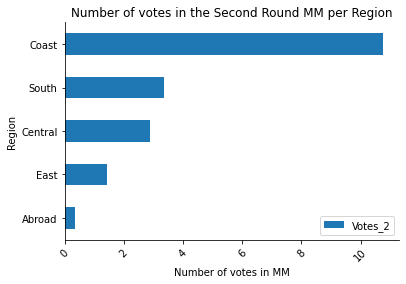

In [64]:
plt.figure()
total_votes.sort_values('Votes_2', inplace=True)
total_votes.plot(kind='barh', x='Region', y='Votes_2');
plt.xticks(rotation='45')
plt.xlabel('Number of votes in MM')
plt.ylabel('Region')
plt.title('Number of votes in the Second Round MM per Region')
sns.despine()
plt.show();

In [65]:
total_votes

,Region,Votes_2
0,Abroad,0.354330
3,East,1.444089
1,Central,2.888144
4,South,3.354631
2,Coast,10.770300


The vote total in the Coast region (10.8 MM) is even higher than the sum of the other 4 regions (7.7 MM).  

#### 1.2.2. Histograms at the candidate level 

##### 1.2.2.1 Fujimori

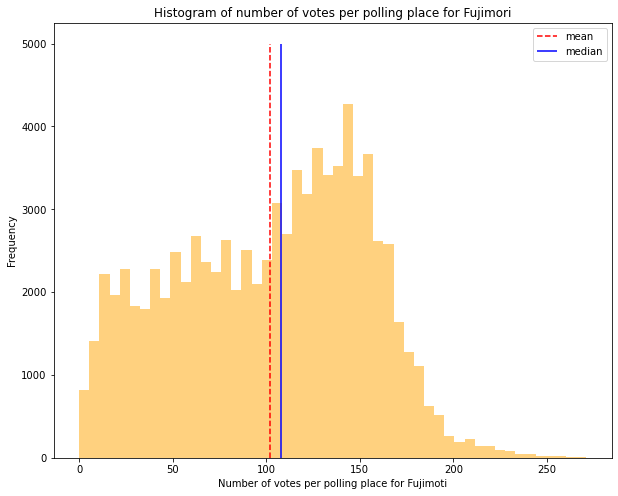

In [66]:
plt.figure(figsize=(10,8))
plt.hist(dfsecond['Fujimori_2'], bins=50, color='orange', alpha=0.5)
plt.xlabel('Number of votes per polling place for Fujimoti')
plt.ylabel('Frequency')
plt.title('Histogram of number of votes per polling place for Fujimori')
plt.vlines(dfsecond['Fujimori_2'].mean(), 0, 5000, color="red", linestyles="--", label='mean')
plt.vlines(dfsecond['Fujimori_2'].median(), 0, 5000, color="blue", linestyles="-", label='median')
plt.legend()
plt.show()

This is a curious looking distirbution. It looks to be bimodal. Perhaps geography has something to do with it. Let's try these histograms on each region. 

Region: Coast


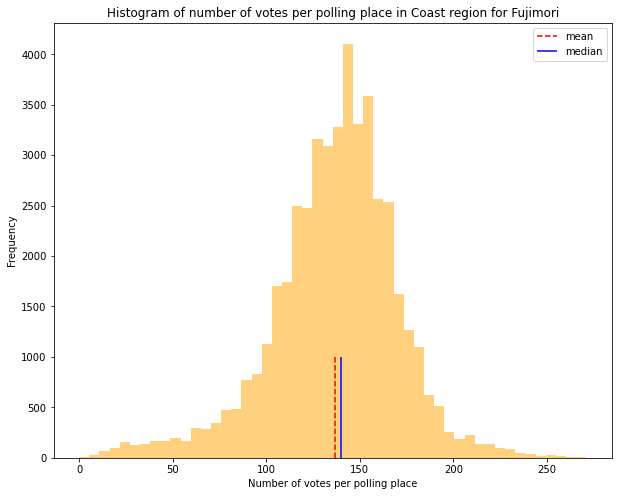



Region: South


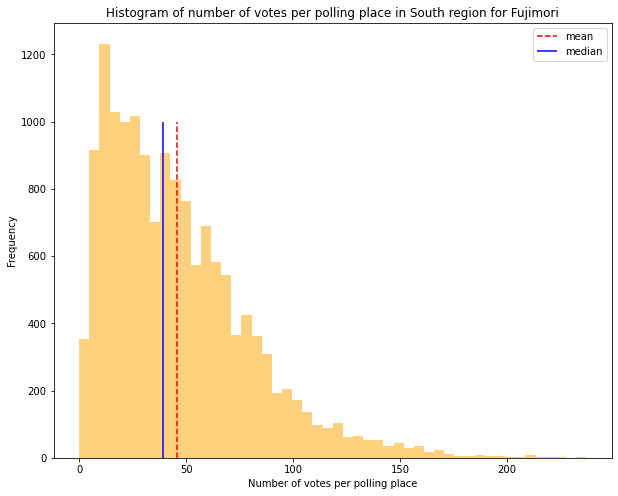



Region: Central


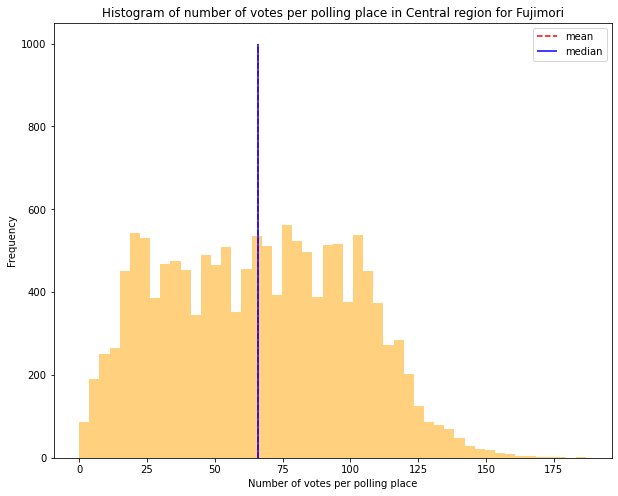



Region: East


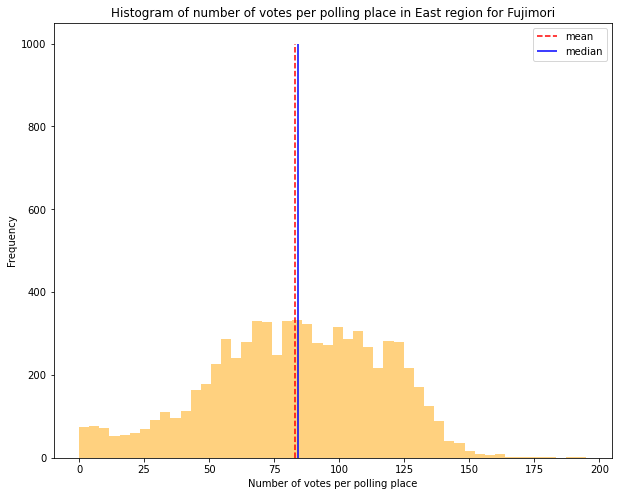



Region: Abroad


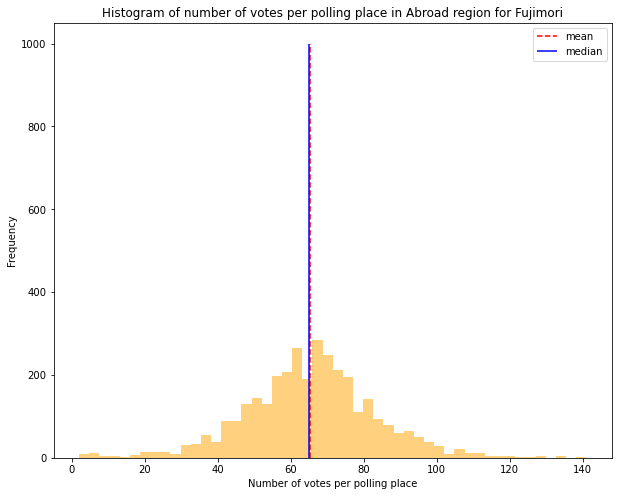

In [67]:
regions=['Coast', 'South', 'Central', 'East', 'Abroad']

for i in regions:
    print('Region:', i)
    
    plt.figure(figsize=(10,8))
    plt.hist(dfsecond[dfsecond['Region']==i]['Fujimori_2'], bins=50, color='orange', alpha=0.5)
    plt.xlabel('Number of votes per polling place')
    plt.ylabel('Frequency')
    plt.title(f"Histogram of number of votes per polling place in {i} region for Fujimori")
    plt.vlines(dfsecond[dfsecond['Region']==i]['Fujimori_2'].mean(), 0, 1000, color="red", linestyles="--", label='mean')
    plt.vlines(dfsecond[dfsecond['Region']==i]['Fujimori_2'].median(), 0, 1000, color="blue", linestyles="-", label='median')
    plt.legend()
    plt.show()

    print('\n')

The South and Center distributions look, perhaps a little odd in shape. There are some outliers on the left side of the distribution for the East and Abroad regions. 

##### 1.2.2.2 Castillo

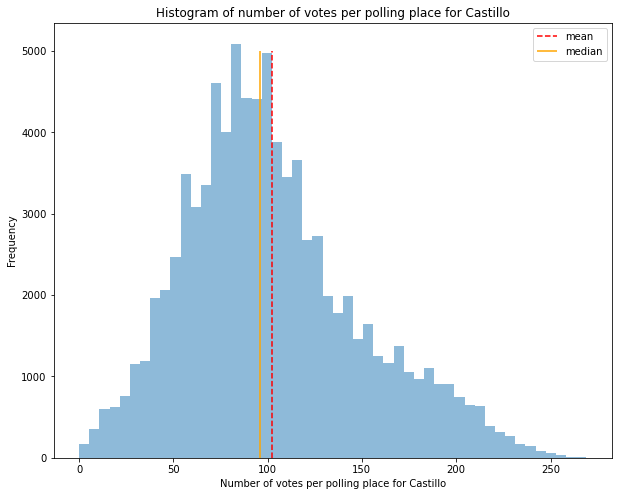

In [68]:
plt.figure(figsize=(10,8))
plt.hist(dfsecond['Castillo_2'], bins=50, alpha=0.5)
plt.xlabel('Number of votes per polling place for Castillo')
plt.ylabel('Frequency')
plt.title('Histogram of number of votes per polling place for Castillo')
plt.vlines(dfsecond['Castillo_2'].mean(), 0, 5000, color="red", linestyles="--", label='mean')
plt.vlines(dfsecond['Castillo_2'].median(), 0, 5000, color="orange", linestyles="-", label='median')
plt.legend()
plt.show()

The mean and median of the distribution are to the right of the mode (~80) although 100 is nearly a second mode. There is a right skew. 

Region: Coast


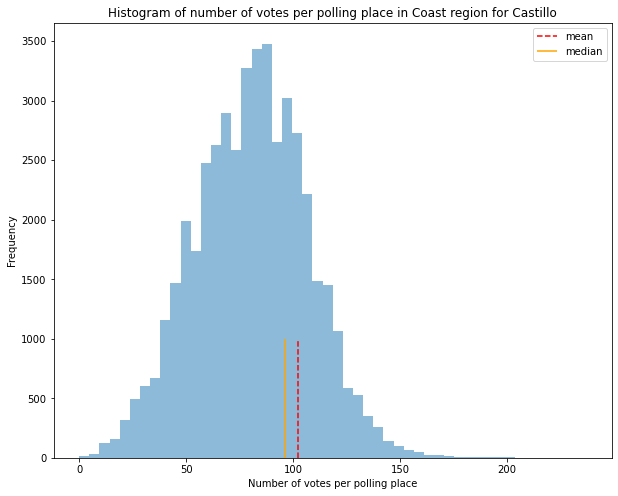



Region: South


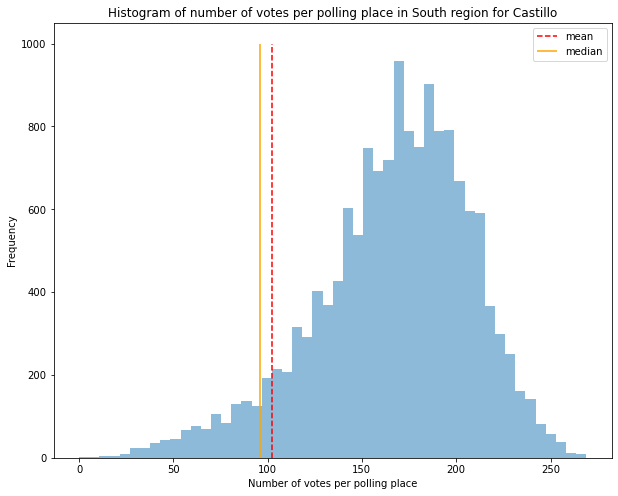



Region: Central


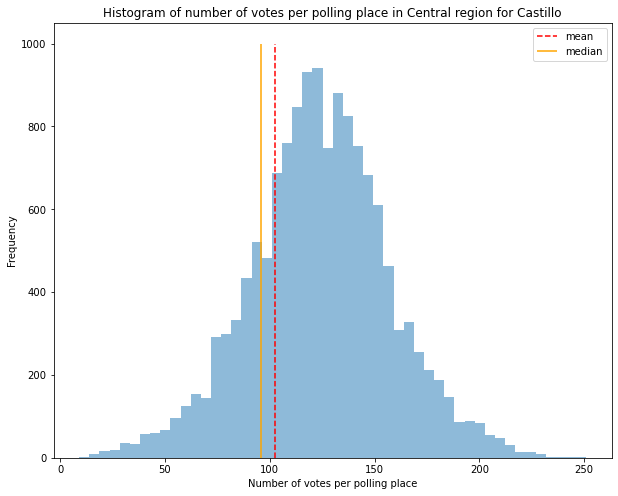



Region: East


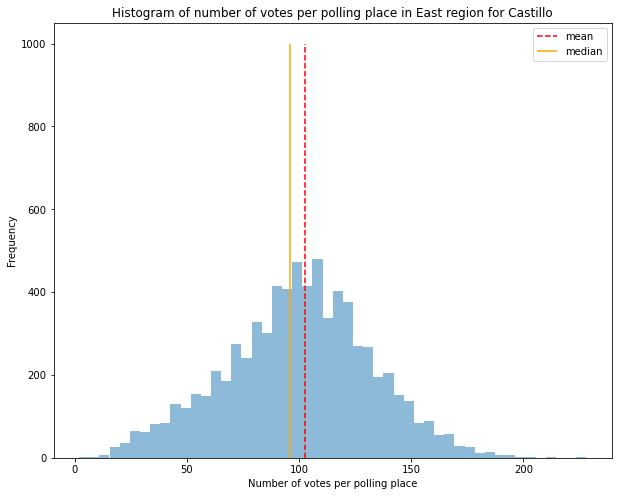



Region: Abroad


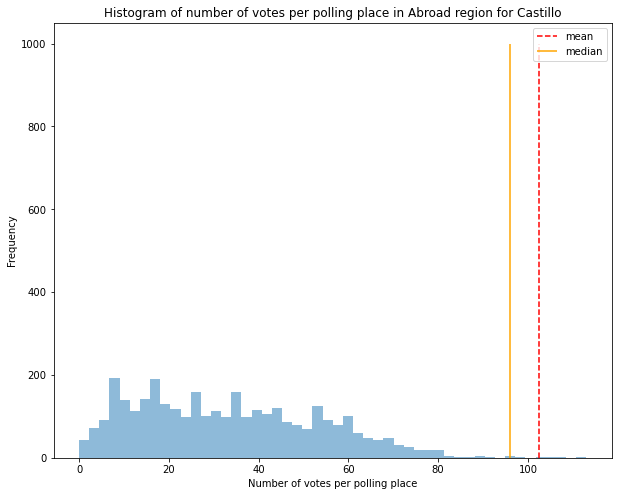

In [69]:
regions=['Coast', 'South', 'Central', 'East', 'Abroad']

for i in regions:
    print('Region:', i)
    
    plt.figure(figsize=(10,8))
    plt.hist(dfsecond[dfsecond['Region']==i]['Castillo_2'], bins=50, alpha=0.5)
    plt.xlabel('Number of votes per polling place')
    plt.ylabel('Frequency')
    plt.title(f"Histogram of number of votes per polling place in {i} region for Castillo")
    plt.vlines(dfsecond['Castillo_2'].mean(), 0, 1000, color="red", linestyles="--", label='mean')
    plt.vlines(dfsecond['Castillo_2'].median(), 0, 1000, color="orange", linestyles="-", label='median')
    plt.legend()
    plt.show()

    print('\n')

Castillo does really well in the South and Central regiones. The distribution Abroad seams similar to Fujimori's distribution in the South i.e, right skewed with a mode at the beginning of the distribution.  

---

## 2. First Round data

In [70]:
dffirst=pd.read_csv('data/first_round.csv', sep=';', index_col=False)

In [71]:
dffirst.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86488 entries, 0 to 86487
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   UBIGEO               86488 non-null  int64  
 1   DEPARTAMENTO         86488 non-null  object 
 2   PROVINCIA            86488 non-null  object 
 3   DISTRITO             86488 non-null  object 
 4   TIPO_ELECCION        86488 non-null  object 
 5   MESA_DE_VOTACION     86488 non-null  int64  
 6   DESCRIP_ESTADO_ACTA  86488 non-null  object 
 7   TIPO_OBSERVACION     0 non-null      float64
 8   N_CVAS               85989 non-null  float64
 9   N_ELEC_HABIL         86488 non-null  int64  
 10  VOTOS_P1             65867 non-null  float64
 11  VOTOS_P2             42510 non-null  float64
 12  VOTOS_P3             72310 non-null  float64
 13  VOTOS_P4             39056 non-null  float64
 14  VOTOS_P5             80936 non-null  float64
 15  VOTOS_P6             84618 non-null 

We can repeat the same type of EDA as conducted for the second round. 

### 2.1. Exploratary Data Analysis

#### 2.1.1 First level

In this first level of EDA we notice that: 

1. `TIPO_OBERVACION` seems to not have any data. Proceed to drop. 
2. `TIPO_ELECCION` refers to the type of election, which is "presidential" for all observations. Proceed to drop. 
3.  All variable names are in Spanish. Proceed to rename.  
4.  Rename the "Votos_" columns with the candidates names according to the ONPE dictionary. 
5.  Rename ballot summary conditions in English. 

In [72]:
## 1. Let's check 'TIPO_OBSERVACION'
dffirst['TIPO_OBSERVACION'].value_counts()

Series([], Name: TIPO_OBSERVACION, dtype: int64)

In [73]:
## It's empty. We proceed to drop it 
dffirst.drop(columns={'TIPO_OBSERVACION'}, inplace=True)

In [74]:
## 2. Let's check 'TIPO_ELECCION'
dffirst['TIPO_ELECCION'].value_counts()

PRESIDENCIAL    86488
Name: TIPO_ELECCION, dtype: int64

In [75]:
## There is only one value, "PRESIDENCIAL". We proceed to drop it 
dffirst.drop(columns={'TIPO_ELECCION'}, inplace=True)

In [76]:
## 3. Renaming the variables using the dictionary provided on the Peruvian Government's Open Data site
## We'll do this by groups

dffirst=dffirst.rename(columns={'UBIGEO':'Geocode', 'DEPARTAMENTO': 'State', 'PROVINCIA':'Province',  'DISTRITO': 'District'  })

In [77]:
dffirst=dffirst.rename(columns={'MESA_DE_VOTACION':'Poll_station', 'DESCRIP_ESTADO_ACTA': 'Ballot_summary_cond_1', 'N_CVAS':'Votes_1', 'N_ELEC_HABIL': 'Eligible_voters_1'})

In [78]:
## 4. Renaming the "Votos_" columns with the Candidates names according to the ONPE data dictionary
dffirst=dffirst.rename(columns={  'VOTOS_P1':'Humala', 
                                  'VOTOS_P2': 'Arana', 
                                  'VOTOS_P3': 'Guzman', 
                                  'VOTOS_P4': 'Santos', 
                                  'VOTOS_P5': 'Forsyth', 
                                  'VOTOS_P6': 'Lescano', 
                                  'VOTOS_P7': 'De_Soto', 
                                  'VOTOS_P8': 'Urresti', 
                                  'VOTOS_P9': 'Mendoza', 
                                  'VOTOS_P10': 'Beingolea', 
                                  'VOTOS_P11': 'Fujimori_1', 
                                  'VOTOS_P12': 'Vega', 
                                  'VOTOS_P13': 'Lopez', 
                                  'VOTOS_P14': 'Galvez', 
                                  'VOTOS_P15': 'Salaverry', 
                                  'VOTOS_P16': 'Castillo_1', 
                                  'VOTOS_P17': 'Alcantara', 
                                  'VOTOS_P18': 'Acuna', 
                                  'VOTOS_VB':'Blank_1',  
                                  'VOTOS_VN': 'Null_1', 
                                  'VOTOS_VI':'Contested_1'})

In [79]:
dffirst.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86488 entries, 0 to 86487
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Geocode                86488 non-null  int64  
 1   State                  86488 non-null  object 
 2   Province               86488 non-null  object 
 3   District               86488 non-null  object 
 4   Poll_station           86488 non-null  int64  
 5   Ballot_summary_cond_1  86488 non-null  object 
 6   Votes_1                85989 non-null  float64
 7   Eligible_voters_1      86488 non-null  int64  
 8   Humala                 65867 non-null  float64
 9   Arana                  42510 non-null  float64
 10  Guzman                 72310 non-null  float64
 11  Santos                 39056 non-null  float64
 12  Forsyth                80936 non-null  float64
 13  Lescano                84618 non-null  float64
 14  De_Soto                82734 non-null  float64
 15  Ur

In [80]:
## 5. Rename ballot_summary conditions to English 
dffirst.loc[dffirst['Ballot_summary_cond_1']=='CONTABILIZADA', 'Ballot_summary_cond_1']='Counted'
dffirst.loc[dffirst['Ballot_summary_cond_1']=='COMPUTADA RESUELTA', 'Ballot_summary_cond_1']='Resolved'
dffirst.loc[dffirst['Ballot_summary_cond_1']=='ANULADA', 'Ballot_summary_cond_1']='Annuled'
dffirst.loc[dffirst['Ballot_summary_cond_1']=='ANULADA POR EXTRAVIADA', 'Ballot_summary_cond_1']='Annulled'
dffirst.loc[dffirst['Ballot_summary_cond_1']=='SIN INSTALAR', 'Ballot_summary_cond_1']='Did not open'
dffirst.loc[dffirst['Ballot_summary_cond_1']=='EN PROCESO', 'Ballot_summary_cond_1']='In process'

In [81]:
dffirst['Ballot_summary_cond_1'].value_counts()

Counted         81924
Resolved         3081
Annuled           949
Did not open      499
In process         32
Annulled            3
Name: Ballot_summary_cond_1, dtype: int64

#### 2.1.2 Second level 

1. Check for null values
2. Check for duplicates
3. Check if votes add up
4. Check Consistency of eligible and actual voters

In [82]:
## 1. Check for null values
dffirst.isna().sum()

Geocode                      0
State                        0
Province                     0
District                     0
Poll_station                 0
Ballot_summary_cond_1        0
Votes_1                    499
Eligible_voters_1            0
Humala                   20621
Arana                    43978
Guzman                   14178
Santos                   47432
Forsyth                   5552
Lescano                   1870
De_Soto                   3754
Urresti                   7612
Mendoza                   2131
Beingolea                24303
Fujimori_1                2192
Vega                     35680
Lopez                     3350
Galvez                   39238
Salaverry                14260
Castillo_1                3122
Alcantara                51515
Acuna                     6197
Blank_1                   2314
Null_1                    1686
Contested_1              83558
dtype: int64

Let's look at `Contested` first. 

In [83]:
dffirst['Contested_1'].value_counts()

0.0    2930
Name: Contested_1, dtype: int64

Like in the second round dataset, it looks like the constested ballot summaries have zeros and the ones that were never contested are NaN. Let's apply the same transformation. 


In [84]:
dffirst.loc[dffirst['Contested_1']==0.0, 'Contested_1']=1

In [85]:
dffirst['Contested_1'].value_counts()

1.0    2930
Name: Contested_1, dtype: int64

All candidates with NaN votes are the low vote candidates. We can replace them with zeros. In the case of `Votes_1`, 499 NaN is the same number as the "did not open" category total for `Ballot_summary_cond_1`. These will be dropped in feature engineering but a zero is also due. 

In [86]:
## Now, let's fill all NaN for the data set with zeroes. 
dffirst=dffirst.fillna(0)

In [87]:
dffirst.isna().sum()

Geocode                  0
State                    0
Province                 0
District                 0
Poll_station             0
Ballot_summary_cond_1    0
Votes_1                  0
Eligible_voters_1        0
Humala                   0
Arana                    0
Guzman                   0
Santos                   0
Forsyth                  0
Lescano                  0
De_Soto                  0
Urresti                  0
Mendoza                  0
Beingolea                0
Fujimori_1               0
Vega                     0
Lopez                    0
Galvez                   0
Salaverry                0
Castillo_1               0
Alcantara                0
Acuna                    0
Blank_1                  0
Null_1                   0
Contested_1              0
dtype: int64

There are no more NaN values. 

In [88]:
## 2. Check for duplicates. Poll_station should be unique values
dffirst['Poll_station'].describe()

count     86488.000000
mean      72590.246924
std      161782.724177
min           1.000000
25%       21622.750000
50%       43244.500000
75%       64866.250000
max      903108.000000
Name: Poll_station, dtype: float64

In [89]:
dffirst['Poll_station'].nunique()

86488

These are the same number of unique polling places as the second round. Thera are 86488 unique poling places. No repeats. 

In [90]:
## 3. Check if Votes add up by subtracting all types of votes from the 'Votes' variable
check = dffirst['Votes_1']- dffirst['Humala'] - dffirst['Arana'] - dffirst['Guzman'] - dffirst['Santos']- dffirst['Forsyth']\
        - dffirst['Lescano'] - dffirst['De_Soto'] - dffirst['Urresti'] - dffirst['Mendoza']- dffirst['Beingolea']\
        - dffirst['Fujimori_1'] - dffirst['Vega'] - dffirst['Lopez'] - dffirst['Galvez']- dffirst['Salaverry']\
        - dffirst['Castillo_1'] - dffirst['Alcantara'] - dffirst['Acuna'] - dffirst['Blank_1']- dffirst['Null_1']

In [91]:
check.sum()

0.0

In [92]:
check.unique()

array([0.])

Only '0's for each row. The vote count adds up. 

In [93]:
## 4. Check consistency of elegible voters > actual voters. 
check2 = dffirst['Eligible_voters_1'] - dffirst['Votes_1']

In [94]:
check2.describe()

count    86488.000000
mean        87.575594
std         44.952969
min          0.000000
25%         60.000000
50%         77.000000
75%        101.000000
max        300.000000
dtype: float64

The minimum value is 0 and there are no negative values. In no case is `Eligible_voters_1` less than `Votes_1`

In [95]:
dffirst['Eligible_voters_1'].sum()

25287954

#### 2.1.3 Feature engineering

Two main features will be addressed in this section: 

1. `REgion`: a new column to help guide the analysis by grouping certain states and the continents abroad
2. `Ballot_summary_cond`: eliminate rows or reclassify all labeling errors in the data

In [96]:
## 1. We'll assign South as the default region because is the most frequent. We'll change the rest accordingly 
dffirst['Region']= 'South'

In [97]:
## Setting the values for the Abroad region
dffirst.loc[dffirst['State'] == 'AFRICA', 'Region']='Abroad'
dffirst.loc[dffirst['State'] == 'AMERICA', 'Region']='Abroad'
dffirst.loc[dffirst['State'] == 'EUROPA', 'Region']='Abroad'
dffirst.loc[dffirst['State'] == 'ASIA', 'Region']='Abroad'
dffirst.loc[dffirst['State'] == 'OCEANIA', 'Region']='Abroad'

In [98]:
## Setting the values for the East region
dffirst.loc[dffirst['State'] == 'AMAZONAS', 'Region']='East'
dffirst.loc[dffirst['State'] == 'UCAYALI', 'Region']='East'
dffirst.loc[dffirst['State'] == 'LORETO', 'Region']='East'
dffirst.loc[dffirst['State'] == 'MADRE DE DIOS', 'Region']='East'
dffirst.loc[dffirst['State'] == 'SAN MARTIN', 'Region']='East'

In [99]:
## Setting the values for the Coast region
dffirst.loc[dffirst['State'] == 'ICA', 'Region']='Coast'
dffirst.loc[dffirst['State'] == 'LIMA', 'Region']='Coast'
dffirst.loc[dffirst['State'] == 'CALLAO', 'Region']='Coast'
dffirst.loc[dffirst['State'] == 'LAMBAYEQUE', 'Region']='Coast'
dffirst.loc[dffirst['State'] == 'LA LIBERTAD', 'Region']='Coast'
dffirst.loc[dffirst['State'] == 'PIURA', 'Region']='Coast'
dffirst.loc[dffirst['State'] == 'TUMBES', 'Region']='Coast'

In [100]:
## Setting the values for the Central region
dffirst.loc[dffirst['State'] == 'CAJAMARCA', 'Region']='Central'
dffirst.loc[dffirst['State'] == 'HUANCAVELICA', 'Region']='Central'
dffirst.loc[dffirst['State'] == 'HUANUCO', 'Region']='Central'
dffirst.loc[dffirst['State'] == 'JUNIN', 'Region']='Central'
dffirst.loc[dffirst['State'] == 'PASCO', 'Region']='Central'
dffirst.loc[dffirst['State'] == 'ANCASH', 'Region']='Central'

In [101]:
dffirst['Region'].value_counts()

Coast      46489
South      14966
Central    14195
East        7398
Abroad      3440
Name: Region, dtype: int64

The second round had ~ 600 polling stations more report votes in the Abroad region. This happened because of COVID restrictions in certain countries. Some of these restrictions were relaxed in the two months between the first and second round. 

*Now, let's clean annulled votes per polling station using `Ballot_summary_cond_1`*

In [102]:
## Dropping Annulled and Did not open 
dffirst.drop(dffirst[dffirst['Ballot_summary_cond_1'] == 'Annulled'].index, inplace=True)
dffirst.drop(dffirst[dffirst['Ballot_summary_cond_1'] == 'Did not open'].index, inplace=True)

In [103]:
dffirst['Ballot_summary_cond_1'].value_counts()

Counted       81924
Resolved       3081
Annuled         949
In process       32
Name: Ballot_summary_cond_1, dtype: int64

In [104]:
## Checking for In Process mislabels and dropping rows where null is equal to votes
dffirst.drop(dffirst[dffirst['Null_1']==dffirst['Votes_1']].index, inplace=True)

In [105]:
dffirst['Ballot_summary_cond_1'].value_counts()

Counted       81924
Resolved       3069
In process        9
Name: Ballot_summary_cond_1, dtype: int64

21 more rows have been dropped. 

In [106]:
## Passing the remainders of In process to Resolved
dffirst.loc[dffirst['Ballot_summary_cond_1'] == 'In process', 'Ballot_summary_cond_1']='Resolved'

In [107]:
dffirst['Ballot_summary_cond_1'].value_counts()

Counted     81924
Resolved     3078
Name: Ballot_summary_cond_1, dtype: int64

In [108]:
## A final check that there are no nulls that equal total votes 
dffirst[dffirst['Null_1']==dffirst['Votes_1']]

,Geocode,State,Province,District,Poll_station,Ballot_summary_cond_1,Votes_1,Eligible_voters_1,Humala,Arana,...,Lopez,Galvez,Salaverry,Castillo_1,Alcantara,Acuna,Blank_1,Null_1,Contested_1,Region


In [109]:
dffirst.shape

(85002, 30)

The final dataset with no null values has 85002 rows, 98.32% of the total possible polling stations. 

In [110]:
## We'll export this clean dataset for other analysis 
dffirst.to_csv('data/first_round_clean.csv', index=False)

### 2.2. Descriptive analysis

In [111]:
## Total eligible voters
dffirst['Eligible_voters_1'].sum()

24849301

In [112]:
## Total votes cast
tot_vot_1=dffirst['Votes_1'].sum()

In [113]:
tot_vot_1

17507467.0

In [114]:
## Turnout was 70.45%
dffirst['Votes_1'].sum()/dffirst['Eligible_voters_1'].sum()

0.7045456530145455

Turnout was 4 points lower in the first round than in the second. 

In [115]:
## total blank votes 
blank_1=dffirst['Blank_1'].sum()

In [116]:
blank_1

2190059.0

In [117]:
## total null votes 
null_1=dffirst['Null_1'].sum()

In [118]:
null_1

916778.0

In [119]:
tot_invalid_vote=blank_1+null_1

In [120]:
## Share of invalid vote
tot_invalid_vote/tot_vot_1

0.17745782413869465

In [121]:
## Total votes cast for Castillo
dffirst['Castillo_1'].sum()

2724752.0

In [122]:
## Share of Castillo vote
dffirst['Castillo_1'].sum()/tot_vot_1

0.15563370760601747

In [123]:
## Total votes cast for Castillo
dffirst['Fujimori_1'].sum()

1930762.0

In [124]:
## Share of Fujimori vote
dffirst['Fujimori_1'].sum()/tot_vot_1

0.11028220130302116

In [125]:
## Share of others
(tot_vot_1-tot_invalid_vote-dffirst['Fujimori_1'].sum()-dffirst['Castillo_1'].sum())/tot_vot_1

0.5566262669522667

In [126]:
## preparing the data for a visualization 
datapie1 = {'Category': ['Castillo', 'Fujimori', 'Invalid','Other16Cand'], 'Share': [15.6, 11.0, 17.7 , 55.7]} 

In [127]:
## Creating a dataframe
dpie1 = pd.DataFrame(datapie1)

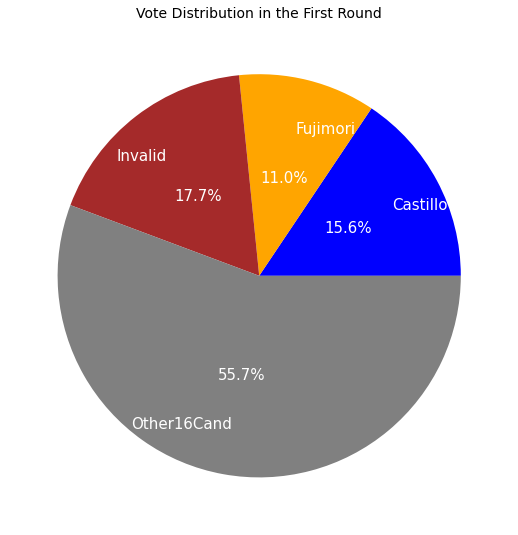

In [128]:
fig = plt.figure(figsize=(7,7))
ax = fig.add_axes([1,1,1,1])
ax.axis('equal')
ax.pie(dpie1['Share'], labels = dpie1['Category'], colors=['blue', 'orange', 'brown', 'gray'], textprops={'size':15, 'color': 'white'}, labeldistance=0.75, pctdistance=0.5, autopct='%1.1f%%')
plt.title('Vote Distribution in the First Round', size=14)
plt.show()

The candidates that qualified for the second round only accounted for 26.6% of the total votes cast in the first round. Both candidates had less vote count than the invalid votes (blank and null). The other 16 candidates distributed the remaining 55.7% of the vote. This was a very fragmentend first round, with apathy being fed by the Covid pandemic. People preferred to not vote (though it's mandatory) instead of risking contagion. 

For the second round, the Covid situation was equally bad (Peru has been suffering from the lambda variant since December 2020), but the stakes were higher. The candidates were perceived as polar opposites in the political spectrum. That motivated a higher turnout. 

#### 2.2.1 Histograms of total votes

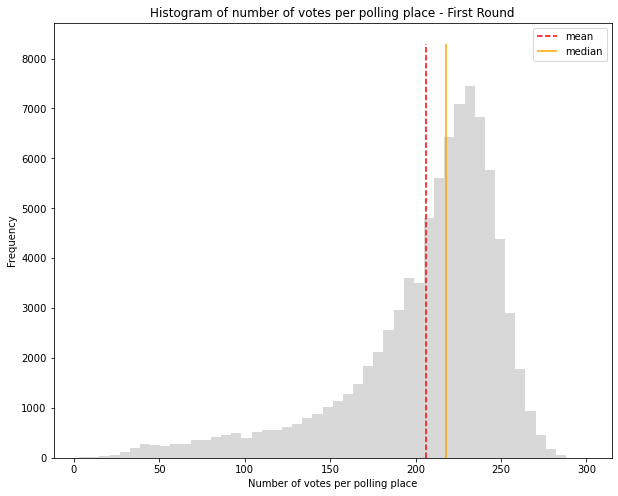

In [129]:
## Lets look at the distribution of vote count at the national level for all candidates
plt.figure(figsize=(10,8))
plt.hist(dffirst['Votes_1'], bins=50, alpha=0.3, color="gray")
plt.xlabel('Number of votes per polling place')
plt.ylabel('Frequency')
plt.title('Histogram of number of votes per polling place - First Round')
plt.vlines(dffirst['Votes_1'].mean(), 0, 8300, color="red", linestyles="--", label='mean')
plt.vlines(dffirst['Votes_1'].median(), 0, 8300, color="orange", linestyles="-", label='median')
plt.legend()
plt.show()

The distribution for the first round is also left_skewed. The mode is to the right of the mean an median. 
There are quite a few polling places where turnout was low.

Let's take a look at the regional Histograms

Region: Coast


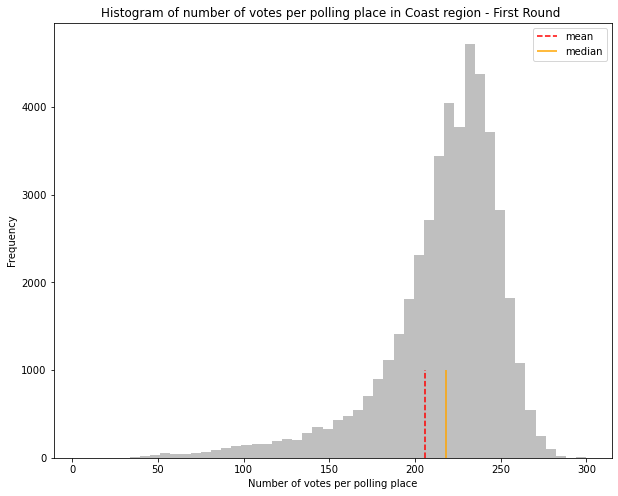



Region: South


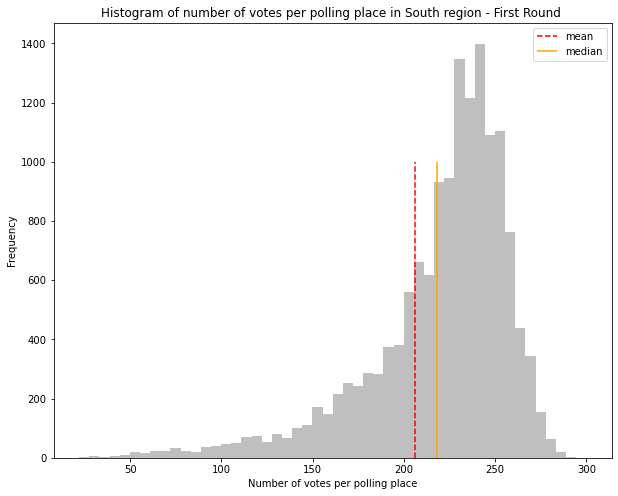



Region: Central


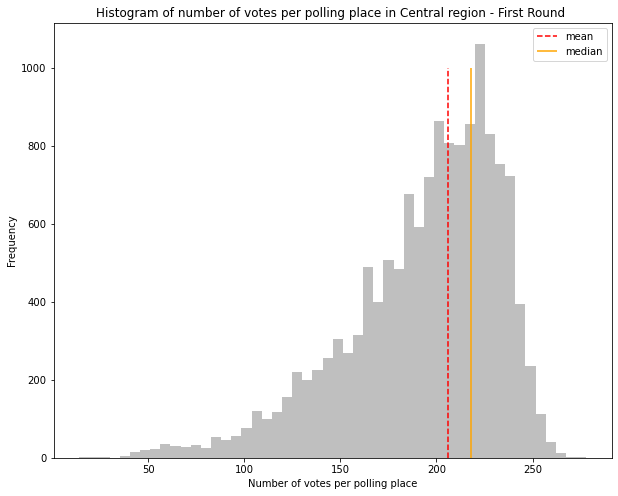



Region: East


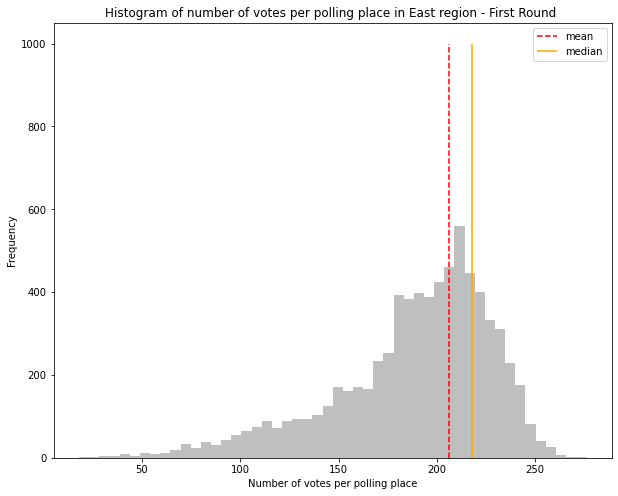



Region: Abroad


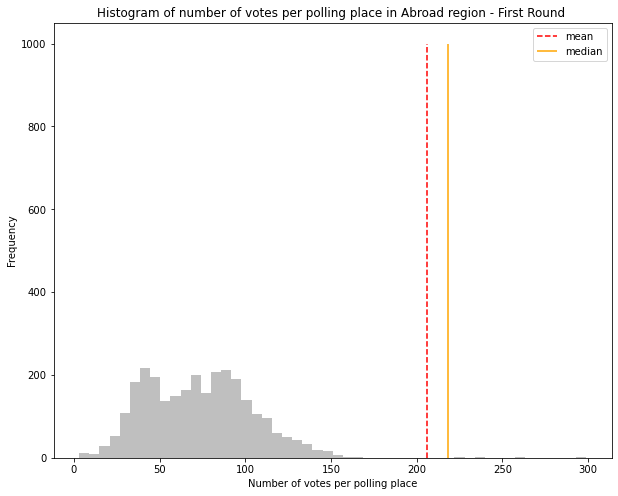

In [130]:
regions=['Coast', 'South', 'Central', 'East', 'Abroad']

for i in regions:
    print('Region:', i)
    
    plt.figure(figsize=(10,8))
    plt.hist(dffirst[dffirst['Region']==i]['Votes_1'], bins=50, color='gray', alpha=0.5)
    plt.xlabel('Number of votes per polling place')
    plt.ylabel('Frequency')
    plt.title(f"Histogram of number of votes per polling place in {i} region - First Round ")
    plt.vlines(dffirst['Votes_1'].mean(), 0, 1000, color="red", linestyles="--", label='mean')
    plt.vlines(dffirst['Votes_1'].median(), 0, 1000, color="orange", linestyles="-", label='median')
    plt.legend()
    plt.show()

    print('\n')

The patterns are similar to those seen in the first round: 

- The Coast and South regions have very similar distributions, with a left skew and the mode to the right of mean and median. 
- The Center and East regions also have a smaller left skew, with the mode being closer to the median, both above the average. 
- The Abroad region seems to be bimodal, with a first mode around 45 voters and a second one around 85. The mode is 0. This is probably due to the annulled polling places. 



## 3. Merge Databases

In [131]:
dfcons=dfsecond.merge(dffirst, left_on='Poll_station', right_on='Poll_station')

In [132]:
dfcons.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84807 entries, 0 to 84806
Data columns (total 43 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Geocode_x              84807 non-null  int64  
 1   State_x                84807 non-null  object 
 2   Province_x             84807 non-null  object 
 3   District_x             84807 non-null  object 
 4   Poll_station           84807 non-null  int64  
 5   Ballot_summary_cond_2  84807 non-null  object 
 6   Votes_2                84807 non-null  float64
 7   Eligible_voters_2      84807 non-null  int64  
 8   Castillo_2             84807 non-null  float64
 9   Fujimori_2             84807 non-null  float64
 10  Blank_2                84807 non-null  float64
 11  Null_2                 84807 non-null  float64
 12  Contested_2            84807 non-null  float64
 13  Region_x               84807 non-null  object 
 14  Geocode_y              84807 non-null  int64  
 15  St

#### 3.1 Additional EDA

In [133]:
##Dropping unnecessary repeated columns '_y' 
dfcons.drop(columns=['Geocode_y', 'State_y', 'Province_y', 'District_y', 'Region_y'], inplace= True)

In [134]:
## Renaming the unnecessary "_x "
dfcons.rename(columns={'Geocode_x': 'Geocode', 'State_x':'State', 'Province_x': 'Province', 'District_x': 'District', 'Region_x':'Region'}, inplace= True)

In [135]:
dfcons.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84807 entries, 0 to 84806
Data columns (total 38 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Geocode                84807 non-null  int64  
 1   State                  84807 non-null  object 
 2   Province               84807 non-null  object 
 3   District               84807 non-null  object 
 4   Poll_station           84807 non-null  int64  
 5   Ballot_summary_cond_2  84807 non-null  object 
 6   Votes_2                84807 non-null  float64
 7   Eligible_voters_2      84807 non-null  int64  
 8   Castillo_2             84807 non-null  float64
 9   Fujimori_2             84807 non-null  float64
 10  Blank_2                84807 non-null  float64
 11  Null_2                 84807 non-null  float64
 12  Contested_2            84807 non-null  float64
 13  Region                 84807 non-null  object 
 14  Ballot_summary_cond_1  84807 non-null  object 
 15  Vo

### 3.2 Feature engineering

In [136]:
##Checking for the same number of eligible voters in each round
dfcons['Elig_delta']= dfcons['Eligible_voters_2'] - dfcons['Eligible_voters_1']

In [137]:
dfcons.sort_values('Elig_delta', ascending=False)

,Geocode,State,Province,District,Poll_station,Ballot_summary_cond_2,Votes_2,Eligible_voters_2,Castillo_2,Fujimori_2,...,Lopez,Galvez,Salaverry,Castillo_1,Alcantara,Acuna,Blank_1,Null_1,Contested_1,Elig_delta
23816,130308,LAMBAYEQUE,LAMBAYEQUE,OLMOS,33033,Counted,204.0,254,106.0,91.0,...,3.0,1.0,3.0,6.0,0.0,5.0,14.0,1.0,0.0,174
11017,30102,APURIMAC,ABANCAY,CIRCA,900448,Counted,200.0,255,156.0,34.0,...,6.0,2.0,2.0,54.0,1.0,1.0,24.0,1.0,0.0,58
41607,150301,LORETO,LORETO,NAUTA,62436,Counted,162.0,300,68.0,84.0,...,6.0,0.0,1.0,3.0,0.0,10.0,37.0,2.0,0.0,46
26927,30102,APURIMAC,ABANCAY,CIRCA,900447,Counted,193.0,243,154.0,33.0,...,5.0,2.0,0.0,39.0,1.0,1.0,25.0,12.0,0.0,46
41606,150301,LORETO,LORETO,NAUTA,62435,Counted,174.0,300,58.0,104.0,...,3.0,0.0,3.0,4.0,1.0,15.0,49.0,4.0,0.0,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69288,30102,APURIMAC,ABANCAY,CIRCA,3929,Counted,160.0,255,139.0,18.0,...,4.0,1.0,1.0,85.0,0.0,1.0,20.0,7.0,0.0,-30
37635,30102,APURIMAC,ABANCAY,CIRCA,3930,Counted,161.0,253,140.0,18.0,...,6.0,0.0,1.0,98.0,2.0,0.0,22.0,6.0,0.0,-32
26315,210101,SAN MARTIN,MOYOBAMBA,MOYOBAMBA,902912,Counted,174.0,235,59.0,55.0,...,19.0,1.0,0.0,23.0,0.0,19.0,28.0,4.0,0.0,-36
63471,210101,SAN MARTIN,MOYOBAMBA,MOYOBAMBA,902914,Counted,180.0,234,84.0,77.0,...,13.0,0.0,0.0,26.0,1.0,9.0,19.0,7.0,0.0,-38


In [138]:
dfcons['Elig_delta'].value_counts()

 0      84452
-1        103
 1         51
-2         46
-3         32
-4         20
-5         13
-6          8
 2          7
 3          6
-9          5
-7          5
 28         4
 45         4
 17         4
-8          3
-11         3
-12         3
 4          3
-38         2
 46         2
 9          2
 16         2
-20         2
 10         2
 58         1
-10         1
-13         1
-14         1
 174        1
-23         1
-18         1
 32         1
 5          1
 11         1
 13         1
 26         1
-36         1
-32         1
 33         1
-21         1
-30         1
-29         1
 35         1
-28         1
 36         1
-22         1
 39         1
Name: Elig_delta, dtype: int64

Although we have almost the same amount of total elegible voters between rounds, some seem to have been relocated between first and second round of the election. The vast majority, 99.6%, of polling places have the same amount of eligible voters in both rounds. Nevertheless, since we want to perform a regression analysis using delta of turnout between rounds, these outliers will cause noise. Since they are a small percentage of observations, we will drop them.   

In [139]:
dfcons.drop(dfcons[dfcons['Elig_delta'] != 0].index, inplace=True)

In [140]:
dfcons.shape

(84452, 39)

In [141]:
## Create a variable that will represent the turnout delta between rounds
dfcons['Vote_delta']= dfcons['Votes_2'] - dfcons['Votes_1']

In [142]:
dfcons.shape

(84452, 40)

We have 84452 observations with valid data for both elections. This accounts for 97.7% of the original dataset. 

In [143]:
dfcons.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84452 entries, 0 to 84806
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Geocode                84452 non-null  int64  
 1   State                  84452 non-null  object 
 2   Province               84452 non-null  object 
 3   District               84452 non-null  object 
 4   Poll_station           84452 non-null  int64  
 5   Ballot_summary_cond_2  84452 non-null  object 
 6   Votes_2                84452 non-null  float64
 7   Eligible_voters_2      84452 non-null  int64  
 8   Castillo_2             84452 non-null  float64
 9   Fujimori_2             84452 non-null  float64
 10  Blank_2                84452 non-null  float64
 11  Null_2                 84452 non-null  float64
 12  Contested_2            84452 non-null  float64
 13  Region                 84452 non-null  object 
 14  Ballot_summary_cond_1  84452 non-null  object 
 15  Vo

The data is clean and ready to be used in the regression analysis. 

In [144]:
## We'll export this clean dataset to perform regression analysis
dfcons.to_csv('data/merged_reg.csv', index=False)

## 4. Conclusions

Through this EDA process, we have performed consistency checks for first and second round data. Some of these consistency checks could be programmed as automatic routines once data is collected: 

- A possible 86488 polling stations were set in both rounds. 

- In the first round, however, ~ 1500 were lost to no opening (499) or having the votes annulled because of problems with the ballot summary sheet(~1000). The first case was due to the Covid pandemic and restrictions abroad. This number was reduced to 6 in the second round. Yet it seems odd to be taking away the right of ~ 218,000 voters to voice their opinion in the election. 

- In the second round ONPE did a better job and 233 ballot summary sheets were annulled (~50,800 votes). 

- Ballot summary sheet conditions have not been updated. At the end, only 2 categories should remain: Processed and Annulled. Reviewed should be a separate variable to indicate if it was ever contested. 

- No missing values should exist within the data. All NaN should be cleaned by routines and place zeros where necessary. 

- For the purpose of consistency in the regression analysis in the following sections, we have kept observations that were not annulled in either round and have the same amount of elegible voters between rounds. The latter is so we can use a turnout delta as an explanatory variable in the regression. It this was not the case, changes in number of votes could be just explained by changes in eligible voters.  Once these rows have been dropped, the final set has 84452 observations, or 97.7% of the total. 

- If ONPE wanted to implement data science checks to their process, they would be well advised to keep the same number of eligible voters in all polling stations, from one round to the next. 

---